In [5]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
import deeplabcut
import tempfile
import yaml

from modules.image_utils import get_image_from_video, show_image, save_image

# function gets colors of body part points based on how many bodyparts there is 
def create_bodypart_colors(bodyparts):
    """Create a color map for bodyparts"""
    # Generate distinct colors for each bodypart
    colors = plt.cm.tab20(np.linspace(0, 1, len(bodyparts)))
    color_dict = dict(zip(bodyparts, colors))
    return color_dict


# make a plot for a single image
def plot_image_with_predict(img , data , bodyparts, confidence):
    colors = create_bodypart_colors(bodyparts)
    
    # Create figure
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    ax.imshow(img)

    # loop through number of bodyparts and access the coordinates by the number of bodyparts as it should match the number of coordinates
    legend_elements = []
    for coordinates in data:

        # print(f"coordinates data {coordinates}")
        
        # this is where the plot for each bodypart will be done individually
        # Loop through each body part and then plot

        for i in range(len(bodyparts)):

            # print(f"bodypart {bodyparts[i]}")
            # print(f"x {coordinates[i][0]}, y {coordinates[i][1]}, likelihood {coordinates[i][2]}")
            x = coordinates[i][0]
            y = coordinates[i][1]
            conf = coordinates[i][2]
            if conf >= confidence:
                color = colors[bodyparts[i]]
                
                # Plot point
                ax.scatter(x, y, c=[color], s=25, edgecolors='white', linewidth=2, zorder=3)
                
                # Add label
                ax.annotate(bodyparts[i], (x, y), xytext=(5, 5), textcoords='offset points',
                            fontsize=6, color='white', fontweight='bold')
                # Add to legend
                legend_elements.append(patches.Patch(color=color, label=f'{bodyparts[i]} ({conf:.2f})'))

    # Add legend
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1), 
            fontsize=8, title='Bodyparts (confidence)')
    
    # Set title 
    ax.set_title(f'DeepLabCut Predictions\nConfidence threshold: {confidence}', 
                fontsize=12)
    ax.axis('off')


    plt.tight_layout()
    plt.show()
    return plt
    


100%|██████████| 1/1 [00:00<00:00, 45.45it/s]


Setting output directory to C:\Users\jiefei\AppData\Local\Temp\tmpo3dym44w
Saving predictions to C:\Users\jiefei\AppData\Local\Temp\tmpo3dym44w\image_predictions_DLC_HrnetW32_Sleap_Rat_testOct2shuffle1_snapshot_best-50.h5


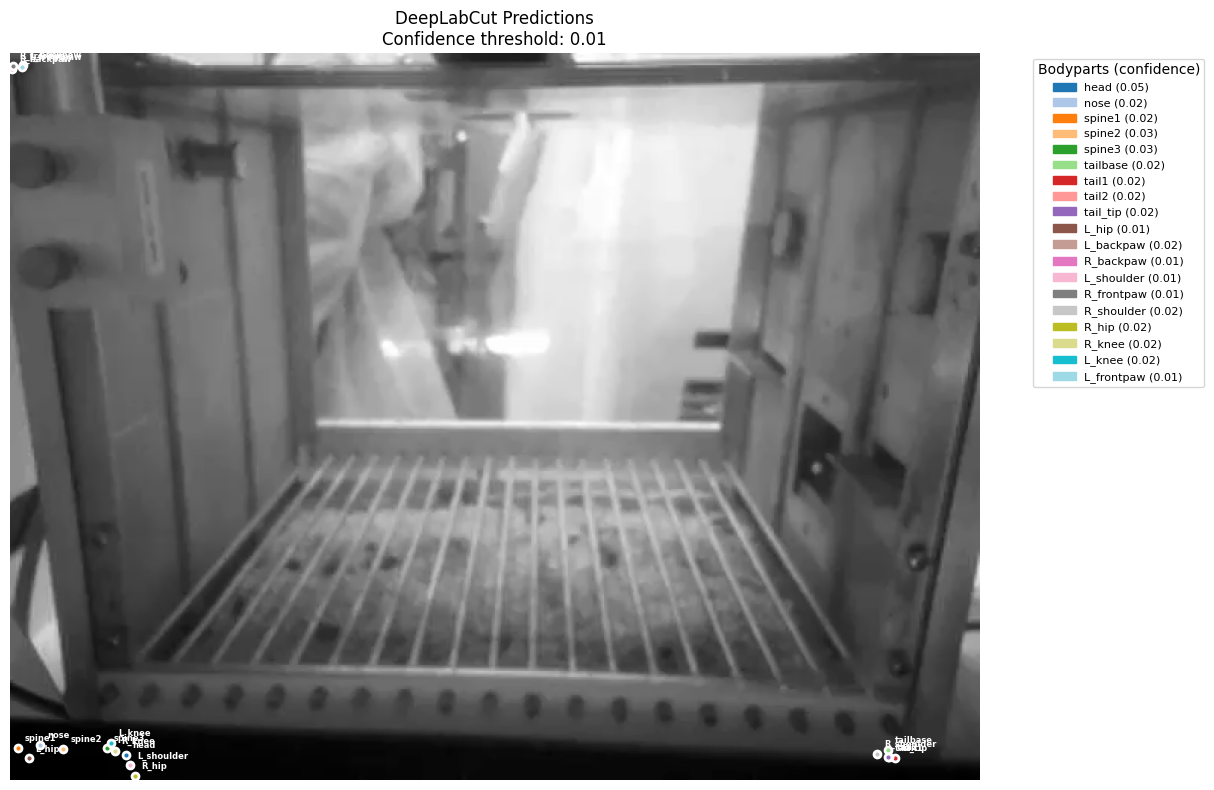

100%|██████████| 1/1 [00:00<00:00, 45.45it/s]


Setting output directory to C:\Users\jiefei\AppData\Local\Temp\tmptt74xu0u
Saving predictions to C:\Users\jiefei\AppData\Local\Temp\tmptt74xu0u\image_predictions_DLC_HrnetW32_Sleap_Rat_testOct2shuffle1_snapshot_best-50.h5


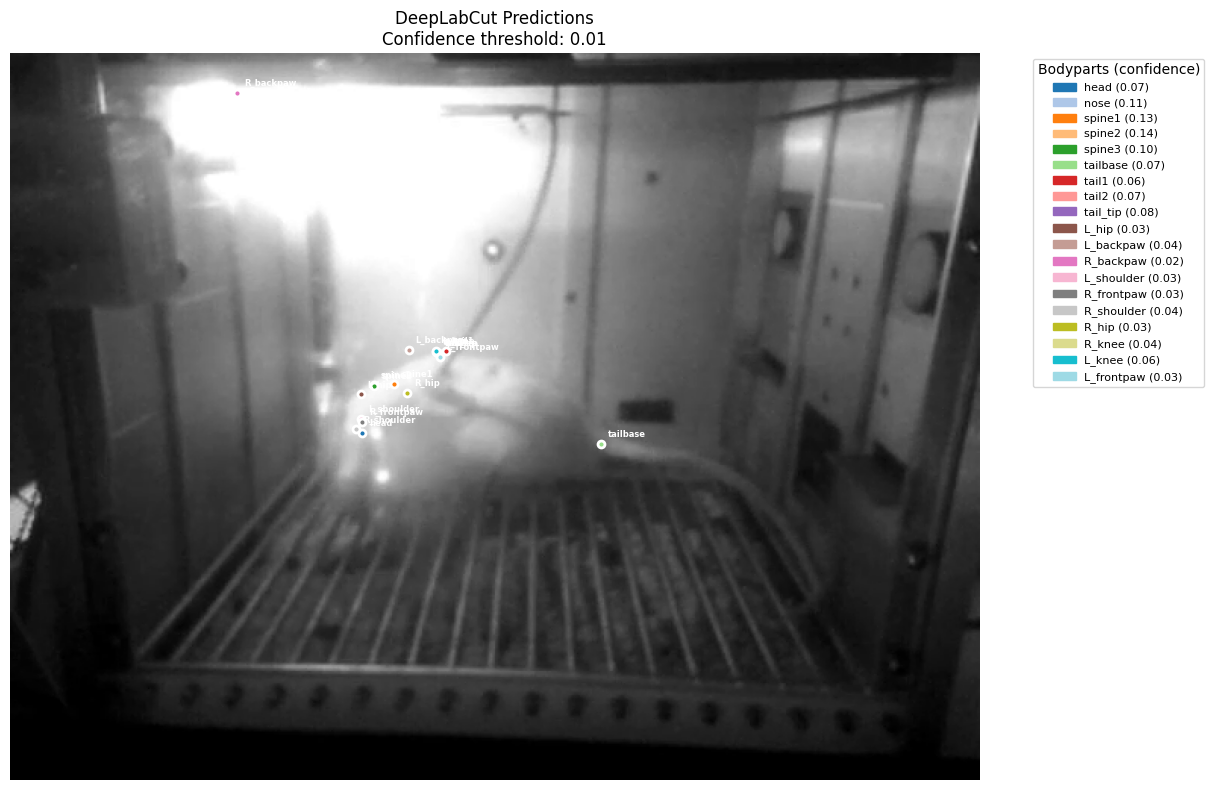

100%|██████████| 1/1 [00:00<00:00, 41.67it/s]


Setting output directory to C:\Users\jiefei\AppData\Local\Temp\tmp5q6ubmkx
Saving predictions to C:\Users\jiefei\AppData\Local\Temp\tmp5q6ubmkx\image_predictions_DLC_HrnetW32_Sleap_Rat_testOct2shuffle1_snapshot_best-50.h5


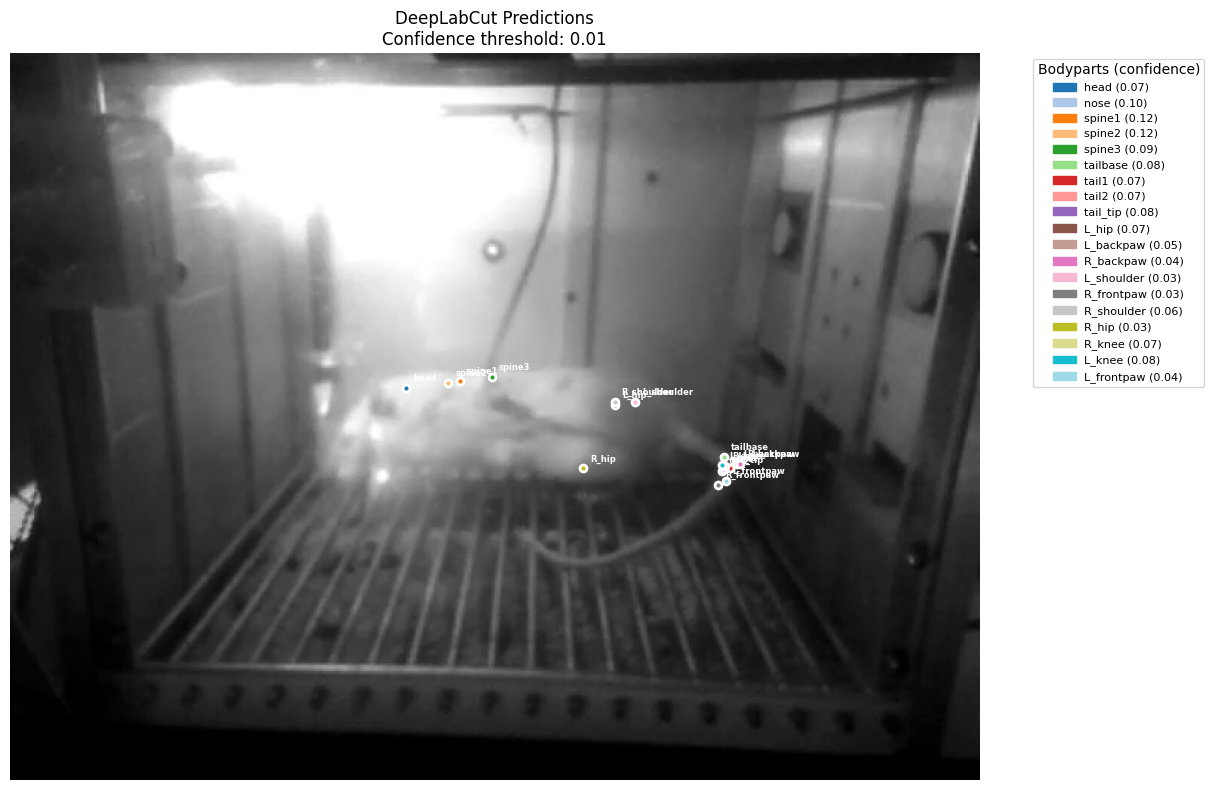

100%|██████████| 1/1 [00:00<00:00, 50.00it/s]


Setting output directory to C:\Users\jiefei\AppData\Local\Temp\tmpu13u900x
Saving predictions to C:\Users\jiefei\AppData\Local\Temp\tmpu13u900x\image_predictions_DLC_HrnetW32_Sleap_Rat_testOct2shuffle1_snapshot_best-50.h5


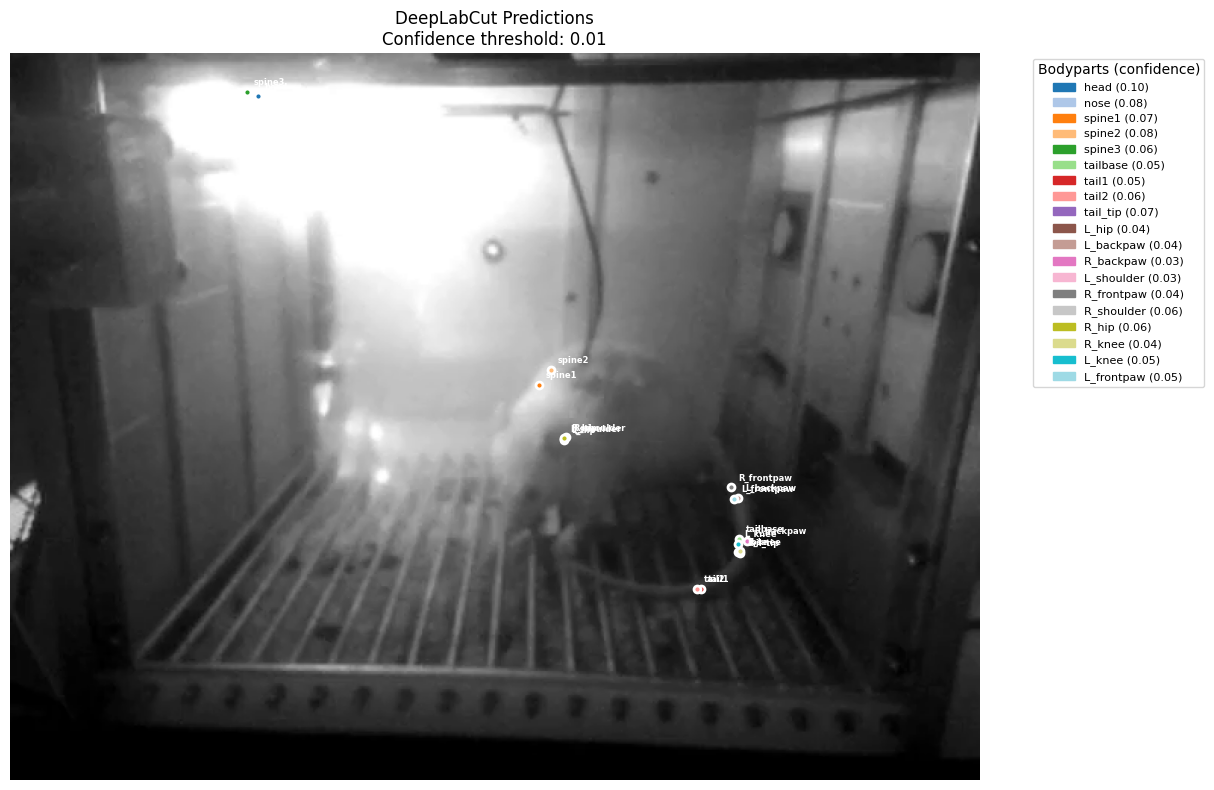

100%|██████████| 1/1 [00:00<00:00, 21.28it/s]


Setting output directory to C:\Users\jiefei\AppData\Local\Temp\tmpw68kmv7r
Saving predictions to C:\Users\jiefei\AppData\Local\Temp\tmpw68kmv7r\image_predictions_DLC_HrnetW32_Sleap_Rat_testOct2shuffle1_snapshot_best-50.h5


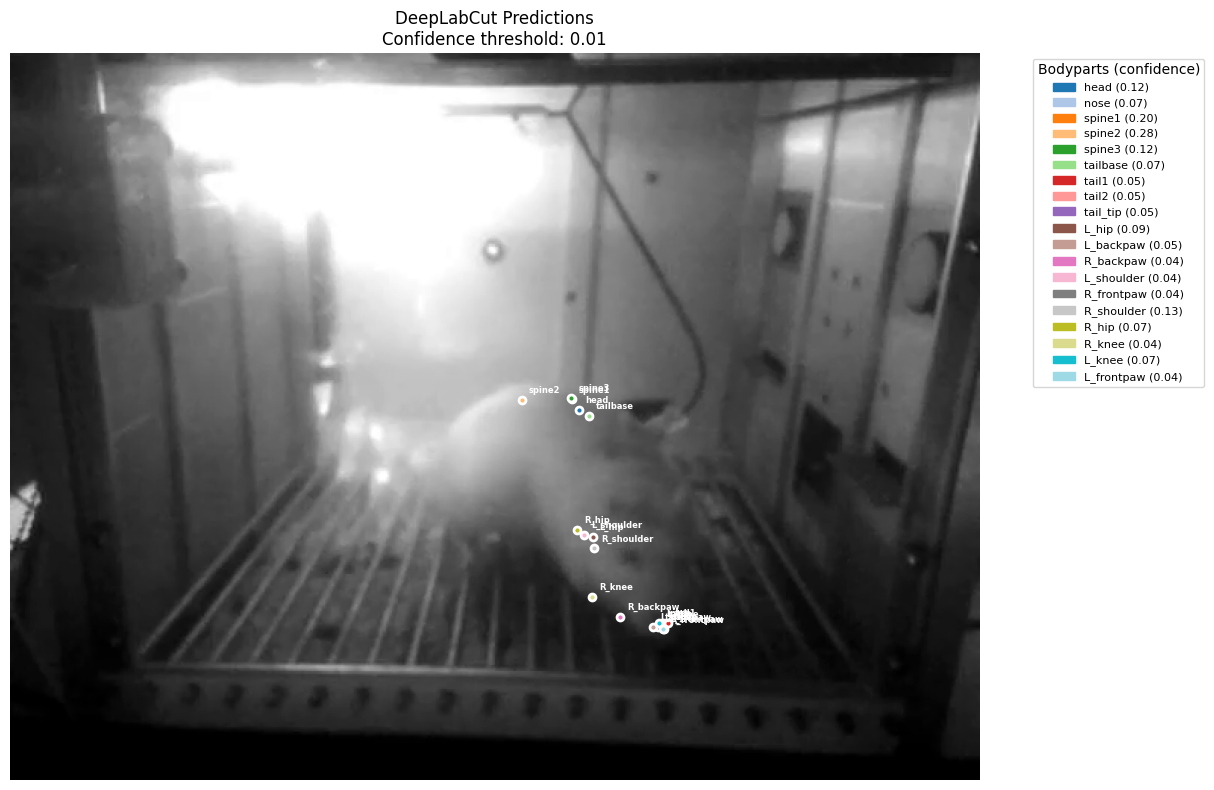

In [13]:


deeplabcut_path = 'projects/rat_pose'
config_path = os.path.join(deeplabcut_path, "config.yaml")

with open(config_path, 'r') as f:
    config = yaml.safe_load(f)


test_video_path = r"projects/rat_pose/videos/RAT 11 FR1.mp4"
frame_indices = range(0,5000, 1000)

for frame_idx in frame_indices:
    img = get_image_from_video(test_video_path, frame_idx) 
    # show_image(img)
    tmp_path = os.path.join(tempfile.mkdtemp(), 'something.png')
    save_image(tmp_path,img)
    
    result = deeplabcut.analyze_images(config_path, images= tmp_path, snapshot_index=-1, shuffle = 1, device = None )
    bodyparts = config['bodyparts']
    confidence_threshold = 0.01
    pred = list(result.values())[0]['bodyparts']


    content = plot_image_with_predict(img, pred, bodyparts, confidence_threshold)